In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("loan-train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
for column in data.columns:
    if data[column].dtype == "object":
        print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
for i,j in enumerate(data.isna().sum()):
    if j > 0:
        print(f"{data.columns[i]} has {j} missing values")

Gender has 13 missing values
Married has 3 missing values
Dependents has 15 missing values
Self_Employed has 32 missing values
LoanAmount has 22 missing values
Loan_Amount_Term has 14 missing values
Credit_History has 50 missing values


In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


614 entries

Categorical:

    Loan_ID
    Gender
    Married
    Dependents
    Education
    Self_Employed
    Property_Area
    Loan_Status

Missing Values:
    
    Gender has 13 missing values
    Married has 3 missing values
    Dependents has 15 missing values
    Self_Employed has 32 missing values
    LoanAmount has 22 missing values
    Loan_Amount_Term has 14 missing values
    Credit_History has 50 missing values

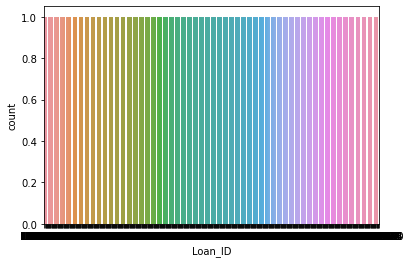

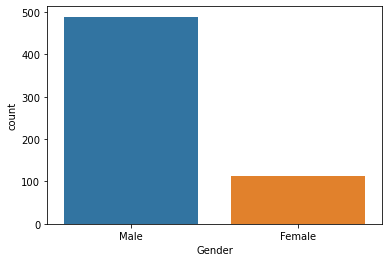

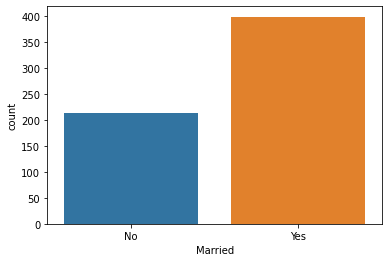

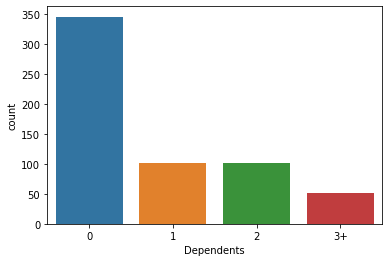

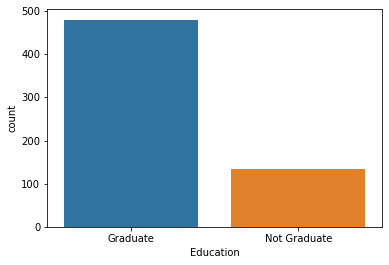

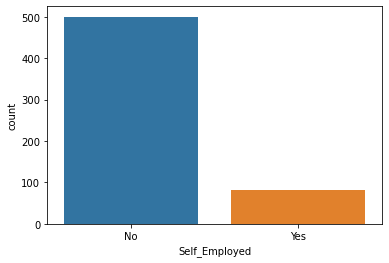

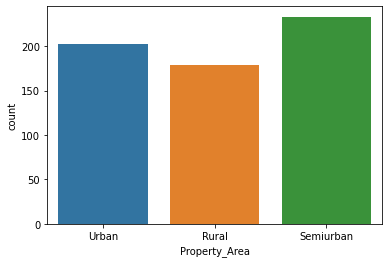

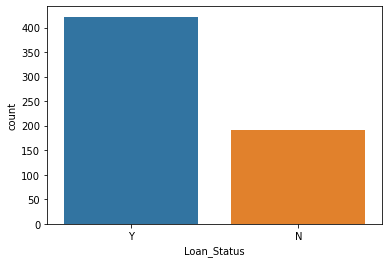

In [17]:
import matplotlib.pyplot as plt
for column in data.columns:
    if data[column].dtype == "object":
        sns.countplot(x = data[column])
        plt.show()

In [19]:
data["Dependents"].replace("3+", 3, inplace=True)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

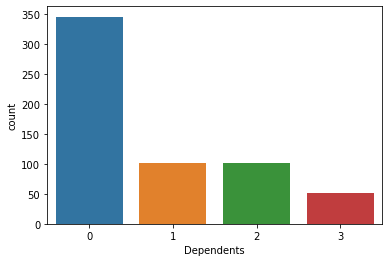

In [21]:
sns.countplot(x =data["Dependents"])

In [25]:
data["Dependents"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [28]:
# missing Value
for column in data.columns:
    if data[column].dtype == "object":
        data[column].fillna(data[column].mode()[0], inplace = True)
    else:
        data[column].fillna(data[column].median(), inplace = True)

In [30]:
data["Dependents"] = data["Dependents"].astype(int)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [33]:
del data['Loan_ID']

In [35]:
data['Gender'].nunique()

2

In [36]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 55.3+ KB


In [47]:
data.Married.unique()

array([0, 1], dtype=int64)

In [46]:
data['Married'].replace({'No': 0, 'Yes': 1,}, inplace=True)

In [49]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [50]:
data['Education'].replace({'Graduate': 1, 'Not Graduate': 0,}, inplace=True)

In [52]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
data['Self_Employed'].replace({'No': 0, 'Yes': 1,}, inplace=True)

In [54]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [56]:
data['Property_Area'].replace({'Urban':1, 'Rural':-1, 'Semiurban':0,}, inplace=True)

In [58]:
data['Loan_Status'].replace({'N': 0, 'Y': 1,}, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


<AxesSubplot:>

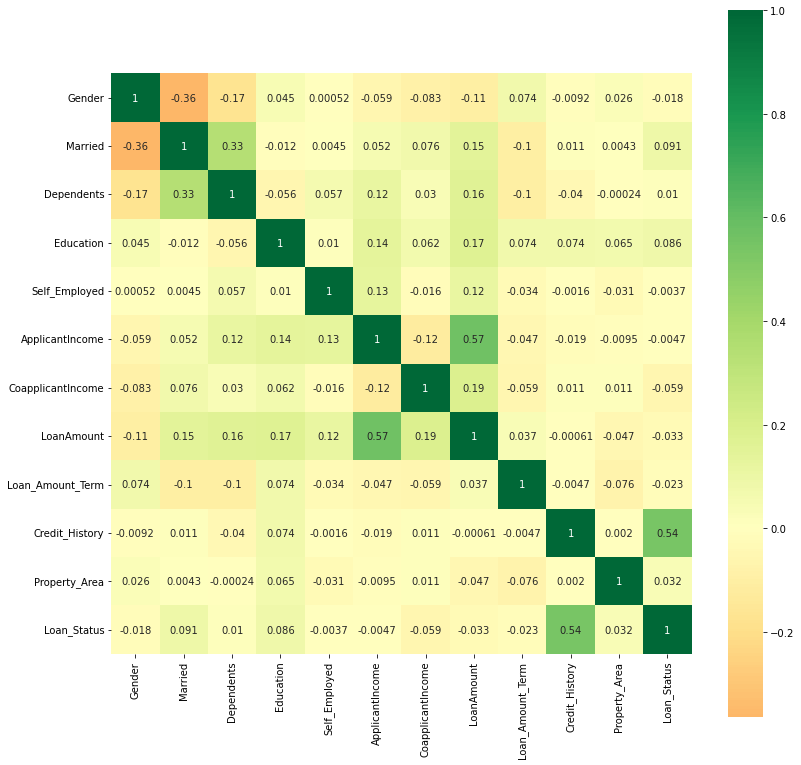

In [61]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), cmap="RdYlGn", center = 0, square=True, annot=True )


In [62]:
X = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
                                                    test_size=0.33, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


LinearRegression()

In [69]:
model.predict(X_train)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [82]:
y_pred = model . predict(X_train)

In [87]:
y_test_pred = model . predict(X_test)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, roc_auc_score,f1_score,confusion_matrix

In [102]:
accuracy_score(y_train, y_pred)

0.8150851581508516

In [96]:
accuracy_score(y_test, y_test_pred)

0.7980295566502463

In [91]:
mean_squared_error(y_train, y_pred)

0.18491484184914841

In [92]:
mean_squared_error(y_test, y_test_pred)

0.2019704433497537

<AxesSubplot:>

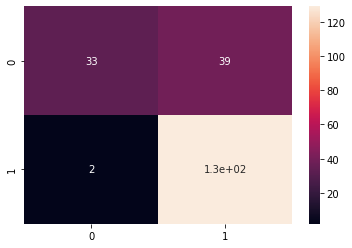

In [111]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)